In [87]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [88]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to /Users/pkc/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [91]:
inaugural.fileids()

list

In [92]:
# lincoln_first=inaugural.raw('1861-Lincoln.txt')

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [93]:
# lincoln_second= inaugural.raw('1865-Lincoln.txt')

In [94]:
# lincFirst= open('lincoln_first','w')
# lincFirst.write(lincoln_first)
# lincFirst.close()

str

In [95]:
# lincSec = open('lincoln_second', 'w')
# lincSec.write(lincoln_second)
# lincSec.close()

[[['Fellow', '-', 'Citizens', 'of', 'the', 'United', 'States', ':', 'In', 'compliance', 'with', 'a', 'custom', 'as', 'old', 'as', 'the', 'Government', 'itself', ',', 'I', 'appear', 'before', 'you', 'to', 'address', 'you', 'briefly', 'and', 'to', 'take', 'in', 'your', 'presence', 'the', 'oath', 'prescribed', 'by', 'the', 'Constitution', 'of', 'the', 'United', 'States', 'to', 'be', 'taken', 'by', 'the', 'President', '"', 'before', 'he', 'enters', 'on', 'the', 'execution', 'of', 'this', 'office', '."']], [['I', 'do', 'not', 'consider', 'it', 'necessary', 'at', 'present', 'for', 'me', 'to', 'discuss', 'those', 'matters', 'of', 'administration', 'about', 'which', 'there', 'is', 'no', 'special', 'anxiety', 'or', 'excitement', '.']], ...]

Interesting nltk.inaugural functions

>>> inaugural.raw('1789-Washington.txt')
'Fellow-Citizens of the Senate ...'
>>> inaugural.words('1789-Washington.txt')
['Fellow', '-', 'Citizens', 'of', 'the', ...]
>>> inaugural.sents('1789-Washington.txt')
[['Fellow', '-', 'Citizens'...], ['Among', 'the', 'vicissitudes'...]...]
>>> inaugural.paras('1789-Washington.txt')
> [[['Fellow', '-', 'Citizens'...]],
 [['Among', 'the', 'vicissitudes'...],
  ['On', 'the', 'one', 'hand', ',', 'I'...]...]...]

In [69]:
listIDs=inaugural.fileids()

In [70]:
inaug_year=[i[:4] for i in listIDs]

In [60]:
for i in listIDs:
    print(str(len(inaugural.words(i)))+" is the number of words for "+str(i[:4]))

1538 is the number of words for 1789
147 is the number of words for 1793
2585 is the number of words for 1797
1935 is the number of words for 1801
2384 is the number of words for 1805
1265 is the number of words for 1809
1304 is the number of words for 1813
3693 is the number of words for 1817
4909 is the number of words for 1821
3150 is the number of words for 1825
1208 is the number of words for 1829
1267 is the number of words for 1833
4171 is the number of words for 1837
9165 is the number of words for 1841
5196 is the number of words for 1845
1182 is the number of words for 1849
3657 is the number of words for 1853
3098 is the number of words for 1857
4005 is the number of words for 1861
785 is the number of words for 1865
1239 is the number of words for 1869
1478 is the number of words for 1873
2724 is the number of words for 1877
3239 is the number of words for 1881
1828 is the number of words for 1885
4750 is the number of words for 1889
2153 is the number of words for 1893
437

In [61]:
num_words_address=[len(inaugural.words(i)) for i in listIDs]

In [96]:
import matplotlib.pyplot as plt
plt.scatter(inaug_year,num_words_address)

In [97]:
import pandas as pd

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [98]:
df_words_address= pd.DataFrame(num_words_address)

In [99]:
df_words_address['year']=inaug_year

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017',
 '2021']

In [100]:
df=df_words_address.copy()

4005

In [101]:
df.columns

1538 is the number of words for 1789
147 is the number of words for 1793
2585 is the number of words for 1797
1935 is the number of words for 1801
2384 is the number of words for 1805
1265 is the number of words for 1809
1304 is the number of words for 1813
3693 is the number of words for 1817
4909 is the number of words for 1821
3150 is the number of words for 1825
1208 is the number of words for 1829
1267 is the number of words for 1833
4171 is the number of words for 1837
9165 is the number of words for 1841
5196 is the number of words for 1845
1182 is the number of words for 1849
3657 is the number of words for 1853
3098 is the number of words for 1857
4005 is the number of words for 1861
785 is the number of words for 1865
1239 is the number of words for 1869
1478 is the number of words for 1873
2724 is the number of words for 1877
3239 is the number of words for 1881
1828 is the number of words for 1885
4750 is the number of words for 1889
2153 is the number of words for 1893
437

In [102]:
df.rename(columns= {0:'num_words'}, inplace=True)

In [103]:
year=df.pop('year')

[1538,
 147,
 2585,
 1935,
 2384,
 1265,
 1304,
 3693,
 4909,
 3150,
 1208,
 1267,
 4171,
 9165,
 5196,
 1182,
 3657,
 3098,
 4005,
 785,
 1239,
 1478,
 2724,
 3239,
 1828,
 4750,
 2153,
 4371,
 2450,
 1091,
 5846,
 1905,
 1656,
 3756,
 4442,
 3890,
 2063,
 2019,
 1536,
 637,
 2528,
 2775,
 1917,
 1546,
 1715,
 2425,
 2028,
 1380,
 2801,
 2946,
 2713,
 1855,
 2462,
 1825,
 2376,
 2726,
 2369,
 1693,
 3104]

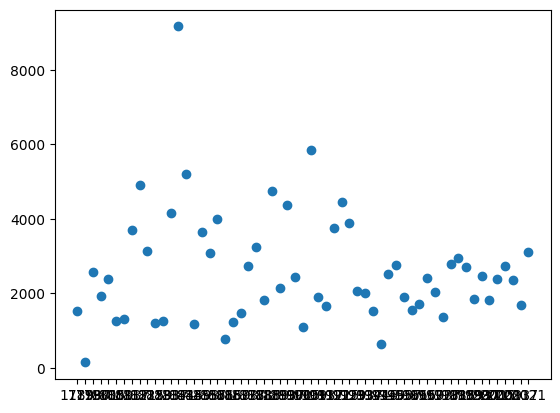

In [104]:
df.insert(0,'year',year)

In [105]:
df

In [106]:
df.plot(x='year',y='num_words',kind='line')

In [107]:
df.num_words.describe()

,0
0,1538
1,147
2,2585
3,1935
4,2384
5,1265
6,1304
7,3693
8,4909
9,3150


In [108]:
# prezList= [listIDs[i][5:-4] for i in listIDs

In [109]:
prezList= []
for i in range(len(listIDs)):
    prezList.append(listIDs[i][5:-4])
prezList

In [113]:
df['president']= prezList

In [112]:
df.to_pickle('inaug_list.pickle')

,0,year
0,1538,1789
1,147,1793
2,2585,1797
3,1935,1801
4,2384,1805
5,1265,1809
6,1304,1813
7,3693,1817
8,4909,1821
9,3150,1825
